In [338]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [339]:
from datasist.structdata import detect_outliers
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error , r2_score

In [340]:
warnings.filterwarnings('ignore')

In [341]:
%matplotlib inline 

In [342]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'Paired' , font_scale = 1.1 ,
             rc = {'figure.figsize' : (8 , 4)}) 

In [343]:
df = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [345]:
df.isnull().mean()*100

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

In [346]:
df.drop(['name'] , axis = 1, inplace = True)

In [347]:
df.duplicated().sum()

842

In [348]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [349]:
df['year'].value_counts()

2017    336
2012    332
2015    327
2014    315
2013    290
2018    285
2016    273
2011    244
2010    205
2009    167
2019    156
2008    127
2007    114
2006     93
2005     60
2020     45
2004     37
2003     22
2002     17
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [350]:
df['age'] = df['year'].apply(lambda x : 2022 - x )

<AxesSubplot:xlabel='age', ylabel='Density'>

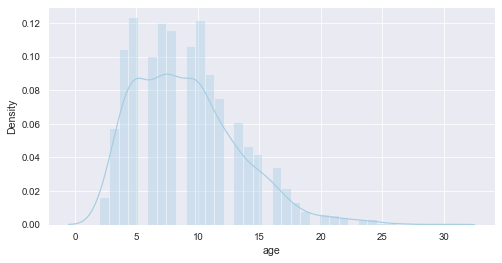

In [351]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='age'>

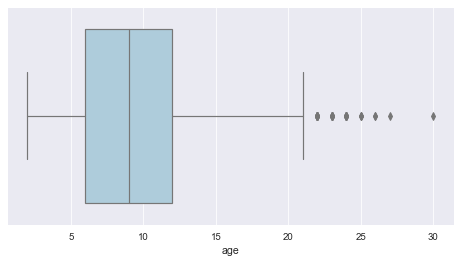

In [352]:
sns.boxplot(df['age'])

In [353]:
len(detect_outliers(df,0,['age']))

37

In [354]:
df.loc[detect_outliers(df,0,['age'])]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
48,1996,250000,35000,Diesel,Individual,Manual,Second Owner,26
124,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner,24
356,2000,60000,40000,Petrol,Individual,Manual,Third Owner,22
374,1999,50000,120000,Petrol,Individual,Manual,Second Owner,23
553,1995,95000,100000,Petrol,Individual,Manual,Second Owner,27
766,1999,85000,70000,Petrol,Individual,Manual,Second Owner,23
981,1999,60000,35000,Petrol,Individual,Manual,Second Owner,23
1036,2000,165000,60000,Petrol,Individual,Manual,Fourth & Above Owner,22
1243,2000,155000,50000,Diesel,Individual,Manual,Second Owner,22
1250,2000,50000,60000,Petrol,Individual,Manual,First Owner,22


In [355]:
df['selling_price'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
selling_price,3498.0,475277.348485,513485.10668,20000.0,200000.0,350000.0,600000.0,8900000.0


<AxesSubplot:xlabel='selling_price'>

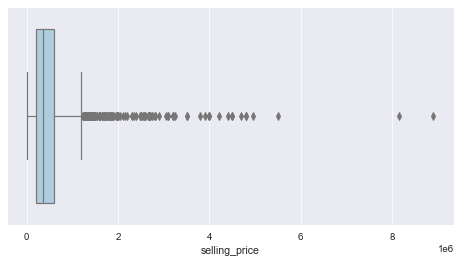

In [356]:
sns.boxplot(df['selling_price'])

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

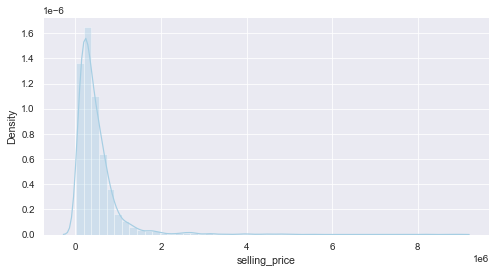

In [357]:
sns.distplot(df['selling_price'])

In [358]:
df['km_driven'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
km_driven,3498.0,69519.497427,47807.764849,1.0,37000.0,61041.5,90000.0,806599.0


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

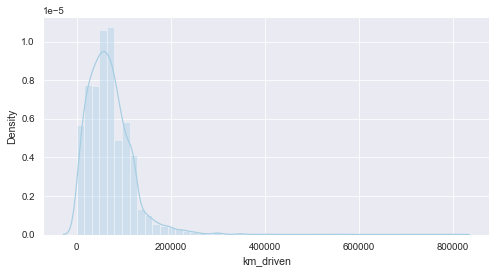

In [359]:
sns.distplot(df['km_driven'])

<AxesSubplot:xlabel='km_driven'>

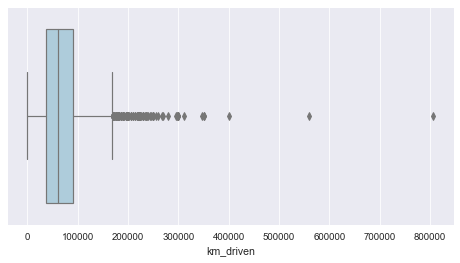

In [360]:
sns.boxplot(df['km_driven'])

In [361]:
len(detect_outliers(df,0,['km_driven']))

119

In [362]:
df.drop(detect_outliers(df,0,['km_driven']) , axis = 0 , inplace = True)

In [363]:
df.reset_index(inplace = True , drop = True)

In [364]:
df['fuel'].value_counts()

Petrol      1663
Diesel      1657
CNG           37
LPG           21
Electric       1
Name: fuel, dtype: int64

In [365]:
df['fuel'] = df['fuel'].apply(lambda x : 'Other' if x in ['CNG' , 'LPG' , 'Electric' ] else x )

<AxesSubplot:xlabel='fuel', ylabel='count'>

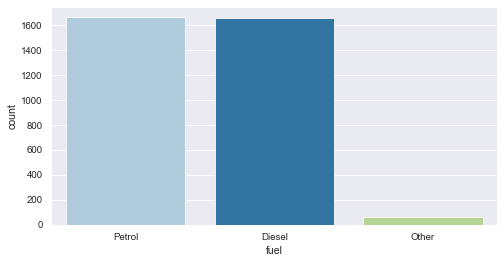

In [366]:
sns.countplot(df['fuel'])

In [367]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [368]:
df['seller_type'].value_counts(normalize=True)*100

Individual          78.248002
Dealer              20.775377
Trustmark Dealer     0.976620
Name: seller_type, dtype: float64

In [369]:
df['seller_type'] = df['seller_type'].apply(lambda x : 'Other' if x in ['Dealer' , 'Trustmark Dealer'] else x )

<AxesSubplot:xlabel='seller_type', ylabel='count'>

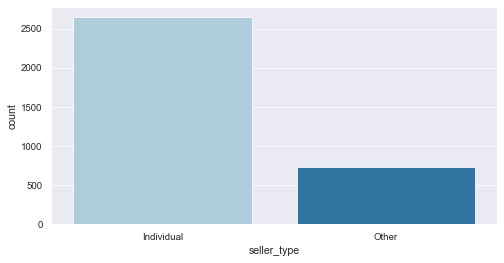

In [370]:
sns.countplot(df['seller_type'])

In [371]:
df['transmission'].value_counts()

Manual       3074
Automatic     305
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='count'>

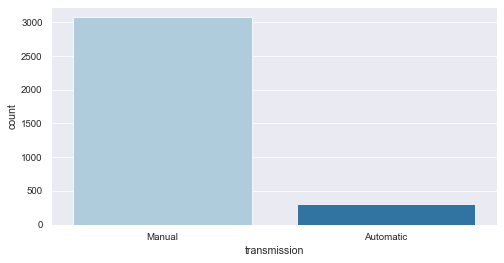

In [372]:
sns.countplot(df['transmission'])

In [373]:
df['owner'].value_counts()

First Owner             2105
Second Owner             930
Third Owner              257
Fourth & Above Owner      70
Test Drive Car            17
Name: owner, dtype: int64

In [374]:
df['owner'] = df['owner'].apply(lambda x : 'Other' if x in ['Fourth & Above Owner' , 'Test Drive Car'] else x )

<AxesSubplot:xlabel='owner', ylabel='count'>

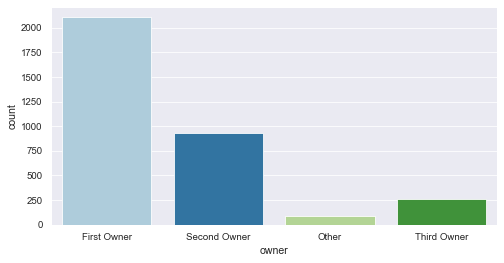

In [375]:
sns.countplot(df['owner'])

In [376]:
col_to_encd = df.select_dtypes('object_').columns

In [377]:
encoder = BinaryEncoder() 

In [378]:
col_to_encd

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [379]:
df = pd.concat([df , encoder.fit_transform(df[col_to_encd])] , axis = 1)

In [380]:
df.drop(col_to_encd , inplace = True , axis = 1 )

In [381]:
df['selling_price'] = np.log(df['selling_price'])

In [382]:
df['age'] = np.log(df['age'])

In [383]:
df.drop(['year'] , inplace = True , axis = 1 )

In [416]:
y = df['selling_price']
x = df.drop(['selling_price'] , axis = 1)

In [417]:
x_train , x_test , y_train , y_test = train_test_split(x , y , 
                                                       random_state = 7 , test_size = 0.15)

In [418]:
col_to_scl = ['age' , 'km_driven']

In [419]:
sclr = StandardScaler()

In [420]:
x_train[col_to_scl] = sclr.fit_transform(x_train[col_to_scl])

In [421]:
x_test[col_to_scl] = sclr.transform(x_test[col_to_scl])

In [422]:
poly = PolynomialFeatures(degree = 3)

In [423]:
x_train = poly.fit_transform(x_train)

In [424]:
model = Ridge()

In [425]:
model.fit(x_train , y_train)

Ridge()

In [426]:
y_train_pred = model.predict(x_train)

In [427]:
y_test_pred = model.predict(poly.transform(x_test))

In [428]:
mean_squared_error(y_true = y_train , y_pred = y_train_pred , squared = False)

0.44306207672249165

In [429]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred , squared = False) 

0.4544548453047255

In [430]:
r2_score(y_true = y_train , y_pred = y_train_pred)

0.7093215121781534

In [431]:
r2_score(y_true = y_test , y_pred = y_test_pred)

0.7036894324973072